In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
csv_file = 'resources/songs_normalize.csv'

In [180]:
df = pd.read_csv(csv_file)

In [181]:
#print(df.head())
#print(df.columns)
#print(df.dtypes)

In [182]:
#selecting the columns of interest
columns_of_interest = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                       'instrumentalness', 'liveness', 'valence', 'tempo']

#calculateing the correlation matrix
correlation_matrix = df[columns_of_interest + ['popularity']].corr()


#finding the attributes with the strongest correlation to popularity
popularity_correlations = correlation_matrix.abs().mean(axis=1).sort_values(ascending=False)

#print the attributes with the strongest correlation to popularity
print("Attributes with the strongest correlation to popularity:")
print(popularity_correlations)

Attributes with the strongest correlation to popularity:
energy              0.275740
loudness            0.245568
valence             0.214896
acousticness        0.200356
danceability        0.194381
tempo               0.154588
liveness            0.152174
speechiness         0.147548
duration_ms         0.138354
instrumentalness    0.124648
popularity          0.112086
dtype: float64


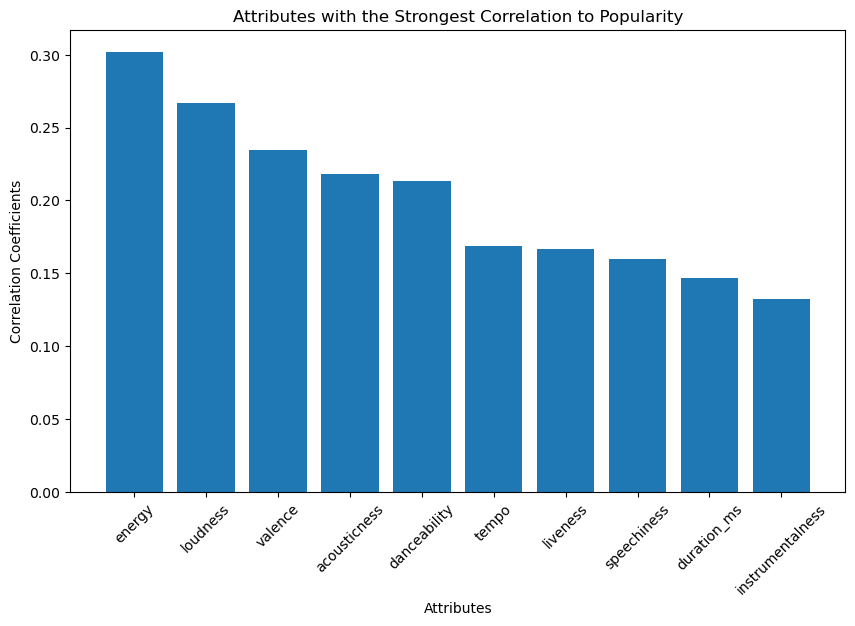

In [183]:
#define the attributes and their correlation coefficients
attributes = ['energy', 'loudness', 'valence', 'acousticness', 'danceability', 'tempo', 'liveness', 'speechiness', 'duration_ms', 'instrumentalness']
correlation_coefficients = [0.301912, 0.267061, 0.234771, 0.217930, 0.213464, 0.168618, 0.166406, 0.160187, 0.147127, 0.132306]

#create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(attributes, correlation_coefficients)
plt.xlabel('Attributes')
plt.ylabel('Correlation Coefficients')
plt.title('Attributes with the Strongest Correlation to Popularity')
plt.xticks(rotation=45)
plt.show()

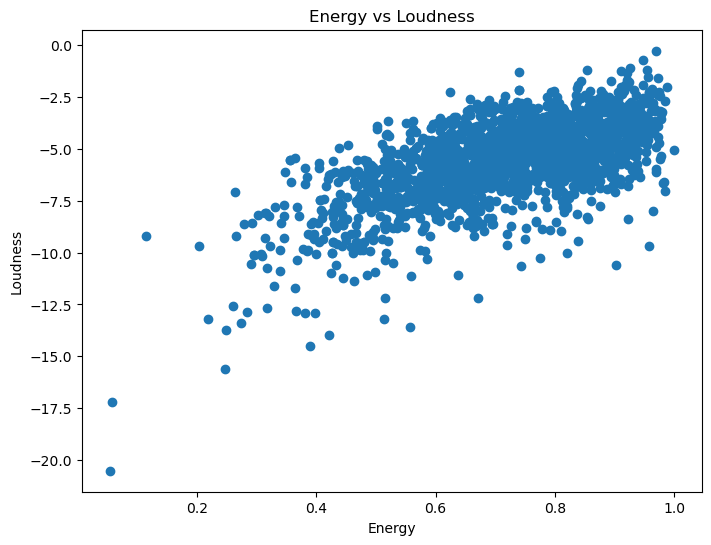

In [184]:
#energy vs Loudness Plot:

plt.figure(figsize=(8, 6))
plt.scatter(df['energy'], df['loudness'])
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy vs Loudness')
plt.show()


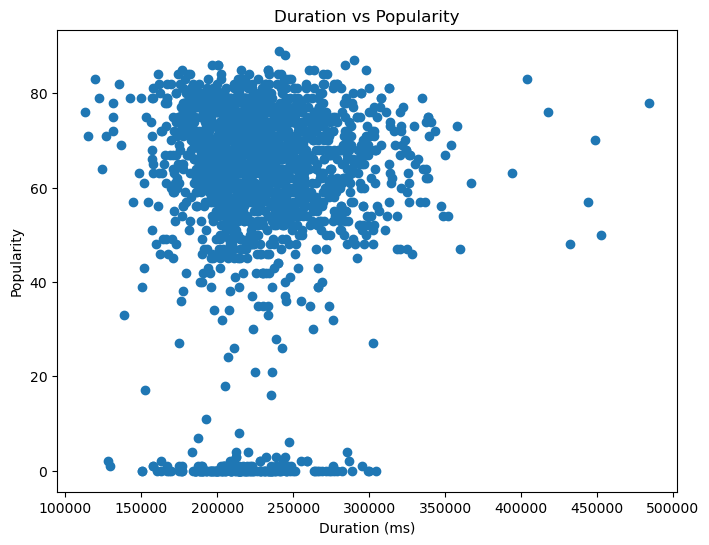

In [185]:
#duration and popularity
plt.figure(figsize=(8, 6))
plt.scatter(df['duration_ms'], df['popularity'])
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Duration vs Popularity')
plt.show()


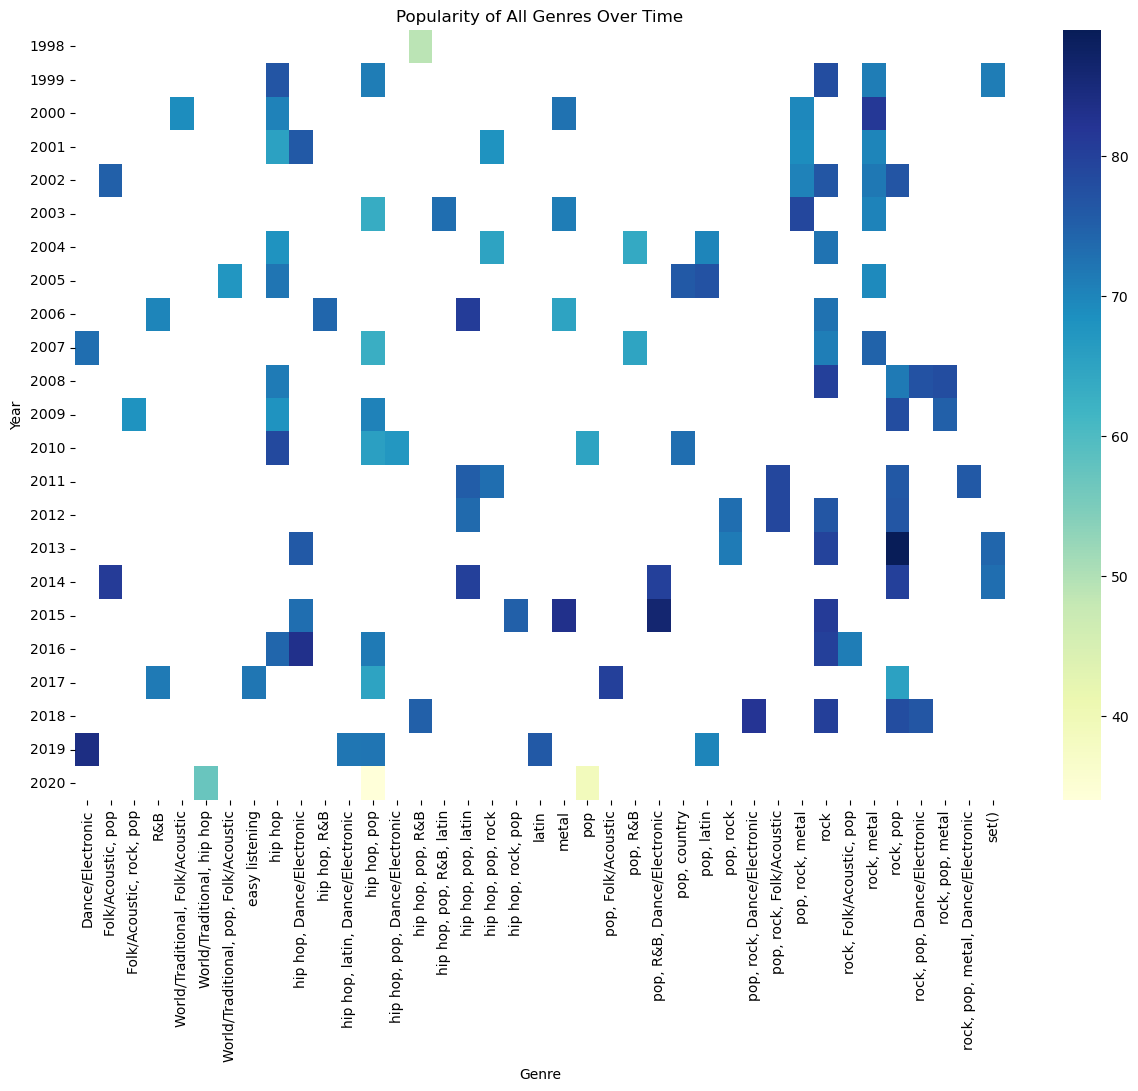

In [186]:
# converting the 'popularity' column to numeric
df['popularity'] = pd.to_numeric(df['popularity'])

# grouping the data by genre and year, and calculate the mean popularity for each genre in each year
genre_year_popularity = df.groupby(['year', 'genre'])['popularity'].mean().reset_index()

# sorting the dataframe by popularity in descending order
genre_year_popularity = genre_year_popularity.sort_values(['year', 'popularity'], ascending=[True, False])

# finding the top 5 most popular genres for each year
top_5_genres_per_year = genre_year_popularity.groupby('year').head(5)

# creating a pivot table for the heatmap. rows represent years, columns represent genres,
# and cell values represent popularity
heatmap_data = top_5_genres_per_year.pivot_table(index='year', columns='genre', values='popularity')

# createing a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu')

plt.title('Popularity of All Genres Over Time')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()




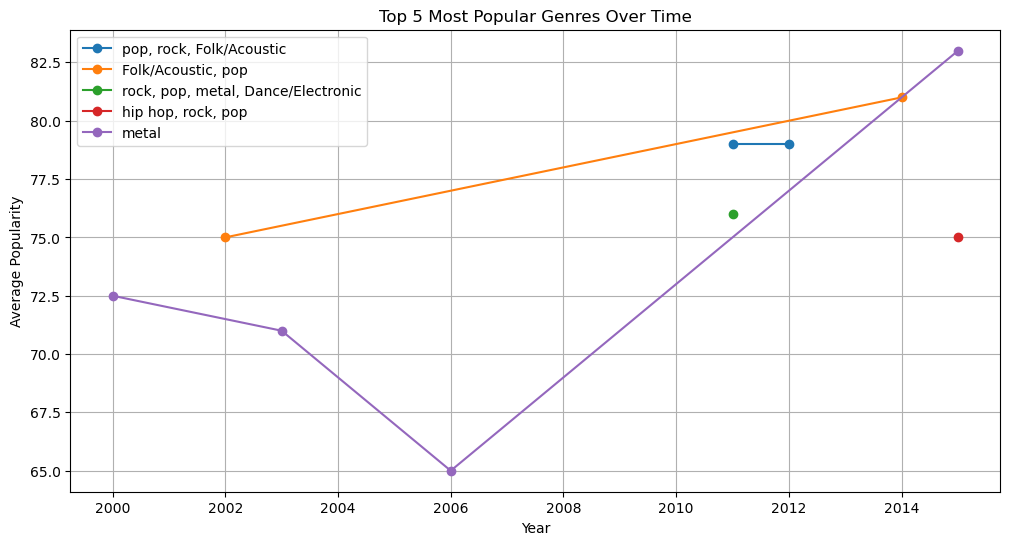

In [178]:
# converting the 'popularity' column to numeric
df['popularity'] = pd.to_numeric(df['popularity'])

# grouping the data by genre and year, and calculate the mean popularity for each genre in each year
genre_year_popularity = df.groupby(['year', 'genre'])['popularity'].mean().reset_index()

# determineing the top 5 genres of all time by average popularity
top_5_genres = genre_year_popularity.groupby('genre')['popularity'].mean().nlargest(5).index

# filtering the original DataFrame to only include the top 5 genres
top_genres_popularity = genre_year_popularity[genre_year_popularity['genre'].isin(top_5_genres)]

# createiing a line plot for each genre
plt.figure(figsize=(12, 6))
for genre in top_5_genres:
    data = top_genres_popularity[top_genres_popularity['genre'] == genre]
    plt.plot(data['year'], data['popularity'], marker='o', label=genre)

plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Top 5 Most Popular Genres Over Time')
plt.legend()
plt.grid()
plt.show()



In [175]:
#Hypothesis: There is a significant difference in the popularity scores between explicit and non-explicit tracks.
#Null Hypothesis: There is no significant difference in the popularity scores between explicit and non-explicit tracks.
from scipy.stats import ttest_ind
#spliting the dataset into two groups based on a condition (e.g., explicit vs. non-explicit tracks)
explicit_tracks = df[df['explicit'] == True]
non_explicit_tracks = df[df['explicit'] == False]
#performing a t-test to compare the popularity scores of the two groups
t_statistic, p_value = ttest_ind(explicit_tracks['popularity'], non_explicit_tracks['popularity'])
#printing the t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 2.085453709873755
P-Value: 0.037154760979321196


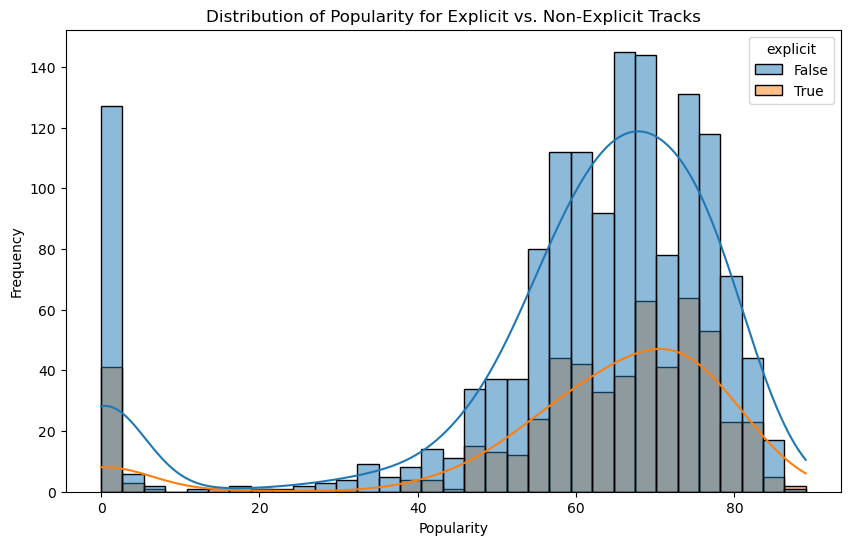

In [177]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df, x='popularity', hue='explicit', kde=True)
plt.title('Distribution of Popularity for Explicit vs. Non-Explicit Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


